In [78]:
import torch
import numpy as np

In [80]:
prediction = torch.load('../hpc-tensors/Best_prediction_1.pt')
prediction = torch.cat((prediction,torch.load('../hpc-tensors/Best_prediction_2.pt')),dim=0)
prediction = torch.cat((prediction,torch.load('../hpc-tensors/Best_prediction_3.pt')),dim=0)
prediction = torch.cat((prediction,torch.load('../hpc-tensors/Best_prediction_4.pt')),dim=0)

targets = torch.load('../hpc-tensors/Targes_1.pt')
targets = torch.cat((targets,torch.load('../hpc-tensors/Targes_2.pt')),dim=0)
targets = torch.cat((targets,torch.load('../hpc-tensors/Targes_3.pt')),dim=0)
targets = torch.cat((targets,torch.load('../hpc-tensors/Targes_4.pt')),dim=0)

prepredictions = torch.load('../hpc-tensors/Best_postpredictions_1.pt')
print(prepredictions.size())
prepredictions = torch.cat((prepredictions,torch.load('../hpc-tensors/Best_postpredictions_2.pt')),dim=0)
prepredictions = torch.cat((prepredictions,torch.load('../hpc-tensors/Best_postpredictions_3.pt')),dim=0)
prepredictions = torch.cat((prepredictions,torch.load('../hpc-tensors/Best_postpredictions_4.pt')),dim=0)



torch.Size([5248, 10])


In [81]:
print(prediction.size())
print(targets.size())
print(prepredictions.transpose(0,1).size())
print(prepredictions.size())
print(prepredictions)
print(prediction)
#prepredictions = prepredictions.transpose(0,1)

torch.Size([21504, 10])
torch.Size([21504, 10])
torch.Size([10, 54400])
torch.Size([54400, 10])
tensor([[4.6317e-01, 7.0194e-01, 3.5376e-03,  ..., 6.6159e-02, 8.6449e-02,
         2.3258e-03],
        [1.6685e-01, 8.2820e-01, 7.0374e-03,  ..., 2.1822e-01, 9.4196e-02,
         3.0286e-05],
        [1.0480e-01, 8.2496e-01, 6.3242e-03,  ..., 2.0515e-01, 7.4765e-02,
         1.2892e-07],
        ...,
        [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00]])
tensor([[0, 1, 0,  ..., 0, 0, 0],
        [0, 1, 0,  ..., 0, 0, 0],
        [0, 1, 0,  ..., 0, 0, 0],
        ...,
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 1,  ..., 0, 0, 0]], dtype=torch.int32)


In [47]:
prediction[:,0:1].sum()

tensor(6598)

In [48]:
65792/21504

3.0595238095238093

In [49]:
for i in range(prediction.size()[1]):
    print(f'Pred:\t{prediction[:,i:i+1].sum()}')
    print(f'Target:\t{targets[:,i:i+1].sum()}')

Pred:	6598
Target:	7397
Pred:	8483
Target:	7662
Pred:	2689
Target:	2615
Pred:	1724
Target:	1942
Pred:	2535
Target:	3117
Pred:	1161
Target:	1469
Pred:	841
Target:	821
Pred:	262
Target:	965
Pred:	94
Target:	1120
Pred:	0
Target:	211


In [50]:
confusionmatrix = np.zeros((4,10), dtype=int)
print(confusionmatrix)
print(prediction.size()[0] == targets.size()[0])

# Make a confusionmattix that contains (in rows):
# 1. count of number of times each positive label (1) was correctly predicted labels.
# 2. count of number of times each negativ label (0) was correctly predicted labels. 
# 3. the number of time each label was predicted, but was not there
# 4. the number of times each label was there, but was not predicted.

# This was done of each of the 10 sublocation

for i in range(prediction.size()[1]):
    for j in range(prediction.size()[0]):
        # 1.
        if prediction[j,i] == 1 and targets[j,i] == 1:
            confusionmatrix[0,i] += 1
        # 2.
        elif prediction[j,i] == 0 and targets[j,i] == 0:
            confusionmatrix[1,i] += 1
        # 3.
        elif prediction[j,i] == 1 and targets[j,i] == 0:
            confusionmatrix[2,i] += 1
        elif prediction[j,i] == 0 and targets[j,i] == 1:
            confusionmatrix[3,i] += 1

confusionmatrix

[[0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]]
True


array([[ 4829,  5649,  2260,  1316,  1775,   573,   657,   118,    26,
            0],
       [12338, 11008, 18460, 19154, 17627, 19447, 20499, 20395, 20316,
        21293],
       [ 1769,  2834,   429,   408,   760,   588,   184,   144,    68,
            0],
       [ 2568,  2013,   355,   626,  1342,   896,   164,   847,  1094,
          211]])

In [51]:
Highlevel_list = ['Nucleus','Cytoplasm','Extracellular','Mitochondrion','Cell membrane','Endoplasmic reticulum','Plastid','Golgi apparatus','Lysosome/Vacuole','Peroxisome']
    
#for j in range(len(Highlevel_list)):
#    print(Highlevel_list[j],end='\t')
for i in range(4):
    for j in range(len(Highlevel_list)):
        print(confusionmatrix[i,j],end='\t')
    print()

4829	5649	2260	1316	1775	573	657	118	26	0	
12338	11008	18460	19154	17627	19447	20499	20395	20316	21293	
1769	2834	429	408	760	588	184	144	68	0	
2568	2013	355	626	1342	896	164	847	1094	211	


In [52]:
Highlevel_list = ['Nucleus','Cytoplasm','Extracellular','Mitochondrion','Cell membrane','Endoplasmic reticulum','Plastid','Golgi apparatus','Lysosome/Vacuole','Peroxisome']
    
#for j in range(len(Highlevel_list)):
#    print(Highlevel_list[j],end='\t')
for i in [0,2,3]:
    for j in range(len(Highlevel_list)):
        print(confusionmatrix[i,j],end='\t')
    print()

# 1. Correctly predicted to be precent
# 2. the number of time each label was predicted, but was not there
# 3. the number of times each label was there, but was not predicted.

4829	5649	2260	1316	1775	573	657	118	26	0	
1769	2834	429	408	760	588	184	144	68	0	
2568	2013	355	626	1342	896	164	847	1094	211	


In [53]:
for j in range(len(Highlevel_list)):

    print(Highlevel_list[j],end=': ')

Nucleus: Cytoplasm: Extracellular: Mitochondrion: Cell membrane: Endoplasmic reticulum: Plastid: Golgi apparatus: Lysosome/Vacuole: Peroxisome: 

In [54]:
count_number_pred = []
count_number_targets = []
for loc_count in range(10):
    count_number_pred.append(0)
    count_number_targets.append(0)


for i in range(prediction.size()[0]):
    for loc_count in range(10):
        if prediction[i].sum() == loc_count:
            count_number_pred[loc_count] += 1
        if targets[i].sum() == loc_count:
            count_number_targets[loc_count] += 1

In [55]:
count_number_pred

[0, 18621, 2883, 0, 0, 0, 0, 0, 0, 0]

In [56]:
count_number_targets

[0, 16418, 4495, 471, 102, 18, 0, 0, 0, 0]

In [57]:
print('Precision')
for j in range(len(Highlevel_list)):
    print(f'{confusionmatrix[0,j]/(confusionmatrix[0,j]+confusionmatrix[2,j]):.3f}',end='\t')
print()
print('Recall')
for j in range(len(Highlevel_list)):
    print(f'{confusionmatrix[0,j]/(confusionmatrix[0,j]+confusionmatrix[3,j]):.3f}',end='\t')
print() 
print('Accuracy')
for j in range(len(Highlevel_list)):
    Tp = confusionmatrix[0,j]
    Tn = confusionmatrix[1,j]
    acc = (Tp+Tn) / (confusionmatrix[:,j].sum())
    print(f'{acc:.3f}',end='\t')
    
    
print() 
print('F1')
for j in range(len(Highlevel_list)):
    p = confusionmatrix[0,j]/(confusionmatrix[0,j]+confusionmatrix[2,j])
    r = confusionmatrix[0,j]/(confusionmatrix[0,j]+confusionmatrix[3,j])
    print(f'{2*p*r/(p+r):.3f}',end='\t')


Precision
0.732	0.666	0.840	0.763	0.700	0.494	0.781	0.450	0.277	

C:\Users\morte\Anaconda3\envs\Master\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in long_scalars
  This is separate from the ipykernel package so we can avoid doing imports until


nan	
Recall
0.653	0.737	0.864	0.678	0.569	0.390	0.800	0.122	0.023	0.000	
Accuracy
0.798	0.775	0.964	0.952	0.902	0.931	0.984	0.954	0.946	0.990	
F1
0.690	0.700	0.852	0.718	0.628	0.436	0.791	0.192	0.043	

C:\Users\morte\Anaconda3\envs\Master\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in long_scalars


nan	

In [58]:
confusionmatrix[:,0]

array([ 4829, 12338,  1769,  2568])

In [59]:
from matplotlib.pyplot import plot as plt

In [83]:
#Due to output being wrong a number of things will be done to make the right dataset ready to be analysed
prepredictions = prepredictions[:21504,:]


tensor([[4.6317e-01, 7.0194e-01, 3.5376e-03,  ..., 6.6159e-02, 8.6449e-02,
         2.3258e-03],
        [1.6685e-01, 8.2820e-01, 7.0374e-03,  ..., 2.1822e-01, 9.4196e-02,
         3.0286e-05],
        [1.0480e-01, 8.2496e-01, 6.3242e-03,  ..., 2.0515e-01, 7.4765e-02,
         1.2892e-07],
        ...,
        [0.0000e+00, 0.0000e+00, 1.0000e+00,  ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00]])
tensor([[0, 1, 0,  ..., 0, 0, 0],
        [0, 1, 0,  ..., 1, 0, 0],
        [0, 1, 0,  ..., 0, 0, 0],
        ...,
        [1, 1, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 1,  ..., 0, 0, 0]], dtype=torch.int32)


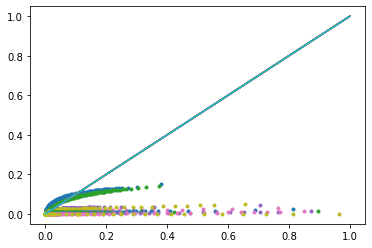

In [85]:
#make AOC graphs for all locations!!!
#numpy.random.uniform(low=0.0, high=1.0, size=None)¶

print(prepredictions)
print(targets)
tensor_row_length = prepredictions.size()[0]
#print(prepredictions)

Highlevel_list
AOC = []

def TPR(TP,FN):
    return TP/(TP+FN)
def Specificity(FP,TN):
    return TN/(TN+FP)
def FPR(FP,TN):
    return FP/(TN+FP)

for i in range(10):
    AOC.append([Highlevel_list[i]])
    x = []
    y = []
    for threshold in np.linspace(0,1,101):

        Predicted_with_threshold = prepredictions[:,i] > threshold
        #print(Predicted_with_threshold.sum())
        Negativ_prediction_with_threshold = prepredictions[:,i] <= threshold
        #print(Negativ_prediction_with_threshold.sum())
        
        #print(targets[:,i].sum())
        #print((targets[:,i] == 0).sum())
        
        #True positive
        TP_count = (Predicted_with_threshold * targets[:,i].type_as(Predicted_with_threshold)).sum().item()

        #False positiv
        FP_count = (Predicted_with_threshold * (targets[:,i] == 0).type_as(Predicted_with_threshold)).sum().item()
        
        #True negativ
        TN_count = (Negativ_prediction_with_threshold * targets[:,i].type_as(Negativ_prediction_with_threshold)).sum().item()

        #False negativ
        FN_count = (Negativ_prediction_with_threshold * (targets[:,i] == 0).type_as(Negativ_prediction_with_threshold)).sum().item()
        
        AOC[i].append((FPR(FP_count,TN_count),TPR(TP_count,FN_count)))
        x.append(FPR(FP_count,TN_count))
        y.append(TPR(TP_count,FN_count))
        
    
    #print(AOC[i])
    #print(AOC[i][1:])
    #print(x)
    plt(x,y, '.')
    x = [0,1]
    y = [0,1]
    plt(x,y)
    #break
    #print(f'threshold = {threshold}')
    #print(((prepredictions[i,:] < threshold).sum().item())/tensor_row_length)




In [62]:
tensor_row_length

21504

In [63]:
(prepredictions[i,:] < threshold).size()

torch.Size([10])

In [64]:
torch.transpose((prepredictions[i,:] < threshold),0,-1)

tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=torch.uint8)

In [65]:
(prepredictions[i,:] < threshold)

tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=torch.uint8)

In [66]:
targets[:,0].size()

torch.Size([21504])

In [67]:
(prepredictions[i,:] < threshold) * targets[:,0]

RuntimeError: The size of tensor a (10) must match the size of tensor b (21504) at non-singleton dimension 0

In [ ]:
(prepredictions[0,:] < 0.5)

In [ ]:
(prepredictions[0,:] < 0.5)

In [ ]:
torch.uint8(targets[:,0])

In [ ]:
targets[:,0].type_as((prepredictions[0,:] < 0.5)) * (prepredictions[0,:] < 0.5)

In [ ]:
targets[:,0].type_as((prepredictions[i,:] < threshold)) != 1